In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import os

#Read data
raw_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','raw', 'Dataset3')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)
df["IsMale"] = np.where(df.Gender== "M", 1 ,0)

df =df.drop(['Gender','CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
ord_enc = OrdinalEncoder()

df["Attrition_Flag"] = ord_enc.fit_transform(df[["Attrition_Flag"]])
df["Education_Level"] = ord_enc.fit_transform(df[["Education_Level"]])
df["Card_Category"] = ord_enc.fit_transform(df[["Card_Category"]])
df["Income_Category"] = ord_enc.fit_transform(df[["Income_Category"]])
df["Marital_Status"] = ord_enc.fit_transform(df[["Marital_Status"]])

df = df.rename(columns={'Attrition_Flag': 'Churn', })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10127 non-null  float64
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  float64
 4   Marital_Status            10127 non-null  float64
 5   Income_Category           10127 non-null  float64
 6   Card_Category             10127 non-null  float64
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [4]:
proccessed_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','processed')
write_train_path = os.path.join(proccessed_data_path,'dataset3.csv')
df.to_csv(write_train_path)

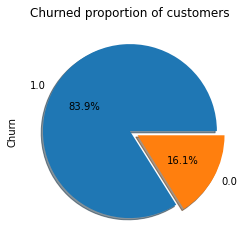

In [5]:
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);
